# Pertemuan 13 Data Science 15
## Sumber : https://youtu.be/5wwXKtLkyqs
## Classification Task Dengan Decision Tree


### Konsep Dasar
#### Terminology : root node, internal node, leaf node.
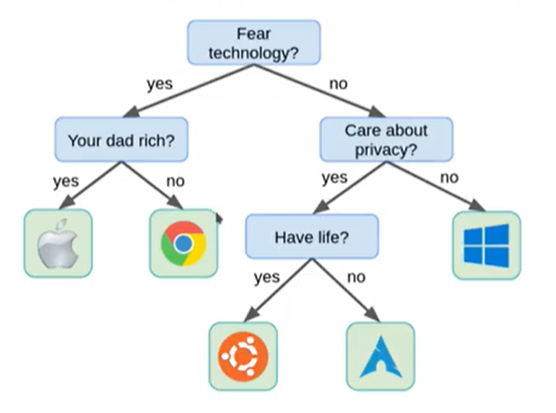

- Decision tree adalah metode klasifikasi menggunakan struktur pohon.
- terdapat tiga komponen untuk Decision Tree:
> - Root Node / akar : Root akan menempati posisi paling atas
> - Internal Node / node  : terdapat pada antara root atau leaf 
> - Leaf Node / daun : Terdapat pada posisi paling bawah, setiap leaf merepresentasikan prediksi class pada struktur tree.

- dalam machine learning terdapat 3 algoritma decision tree (CART : Classification and Regression Tree).
- Algoritma lainnya :
> - ID3
> - C4.5
> - C5.0

#### Gini Impurity (Pengukuran ketidak murnian)
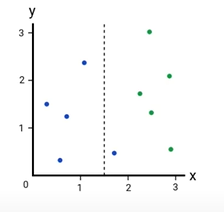

- Gini Impurity, memiliki jangkauan nilai 0 dan 1, nilai 0 adalah nilai murni atau sempurna, nilai 1 adlaah nilai yang tidak murni.
- garis putus putus berperan sebagai splitter.
- pengukuran impurity 
> - menghitung ruas kiri. 
> - menghitung ruas kanan.
> - mencari nilai tengah dari gini impurity.

#### Ruas Kiri :

### $ G = 1 - \sum\limits_{i}^{n}  P_{i}^{2} $
### $ G = 1 - P(biru)^{2} $
### $ G = 1 - (\frac{4}{4})^{2} = 0$

- menghitung berapa data point yang berwarna yang sama bila pada spilter.
- dari sana bila hasilnya 0 maka semuanya murni biru.

#### Ruas Kanan :

### $ G = 1 - \sum\limits_{i}^{n} P_{i}^{2} $
### $ G = 1 - (P(Biru)^2 + P(hijau)2) $
### $ G = 1 - ((\frac{1}{6})^2 + (\frac{5}{6})^2) = 0.278 $

#### Average Gini Impurity :

### $ G = \frac {4}{4 + 6} \times 0 + \frac{6}{4 + 6} \times 0.278 $
### $ G = 0.1668 $

#### Information Gain
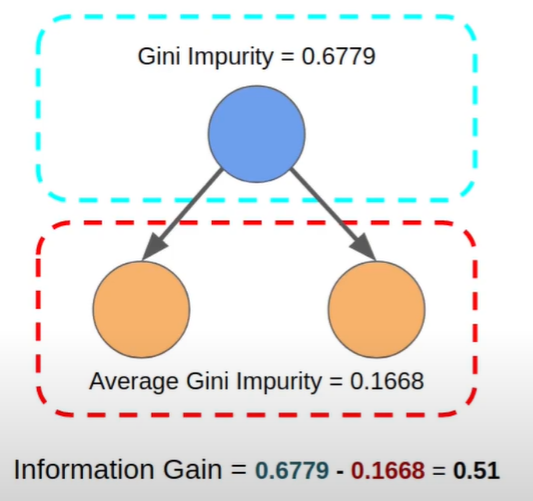

- information gain dapat didapatkan dengan mengselishkan nilai gini umprurity sebelum spliting dan rata rata gini impurity

#### Membagun Decision Tree
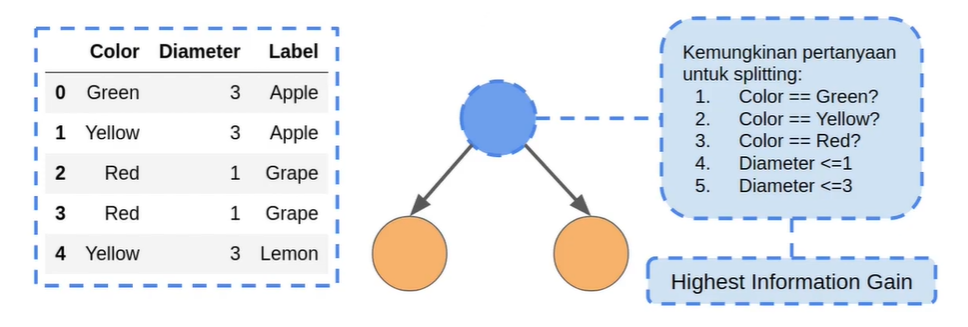

### $ G = 1 - (P(apple)^2 + P(grape)^2 + P(lemon)2)$
### $ G = 1 - ((\frac{2}{5})^2 + (\frac{2}{5})^2 + (\frac{1}{5})^2)$
### $ G = 0.63 $

- proses pembentukan Decision Tree,
> - color dan diameter akan menjadi feature dan kolom label akan menjadi target label.
> - mencari tahu kemungkinan dari dataset yang diberikan. melihat informasi apa yang paling banyak.
> - menghitung berdasarkan label.
> - nilai akhirnya yaitu nilai Gene Impurity. warna biru adalah gene Impurity.
> - melakukan spliting untuk setiap pertanyaan, dan akan melakukan kalkulasi hingga akhirnya menghasilkan nilai 0.

### Dataset

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class : {set(y)}')

Dimensi Feature: (150, 4)
Class : {0, 1, 2}


- `return_X_y` akan membuat 2 variable. maka dari itu perlu dibuat 2 variable untuk menampung.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

- melakukan `train_test_split` digunakan untuk spliting.

### Classification dengan `DecisionTreeClassifier`

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

- untuk melakukan `DecisionTreeClassifier` akan memerlukan `max_depth` digunakan untuk melakukan layernya
- menentukan Feature dan tragetnya.

### Visualisasi Model

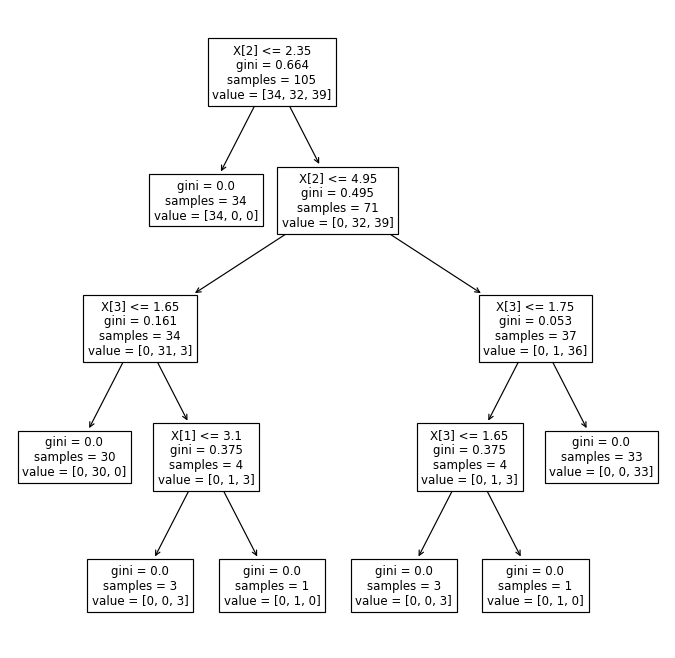

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10,10))
tree.plot_tree(model, fontsize=10)
plt.show()

cara melakukan visualisasi model
- melakukan import modul `import matplotlib.pyplot as plt` dan melakukan import `from sklearn import tree`
- melakukan settingan dpi, menggunakan `plt.rcParams['figure.dpi'] = val`
- menyiapkan figurenya dengan `plt.subplots(figsize=(10,10))`
- membuat treenya `tree.plot_tree(train_model, fontsize=10)`

hasil :
- terdapat 7 leafs, 1 root dan 5 nodes.
- informasi pertama kriteria spliting `X[3] <= 0.75` artinya menggunakan index feature ke 3 dan apakah lebih kecil sama dengan 0.75
-  informasi kedua `gini = 0.664` artinya gini impurty
- informasi ketiga `samples = 105` artinya jumlah data sebelum spliting
- informasi keempat `value = [34,32,39]` yang artinya kelas index ke 0 terdapat 34, index ke 1 terdapat 32, index ke 3 terdapat 39 data.
- melakukan spliting menurut kriteria datanya.

### Evaluasi Model

In [9]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



evaluasi performa :
- melakukan import modul `from sklearn.metrics import classification_report`
- melakukan prediksi `y_pred = model.predict(X_test)`
- melakukan evaluasi report `print(classification_report(y_test, y_pred))`

dari data ini nilai precision, recall, F1-score dan support.